In [20]:
# pip install imagededup


In [2]:
image_dir=r'data\multi-class-knee-osteoporosis-x-ray-dataset'


In [3]:
from imagededup.methods import PHash
phasher = PHash()
image_dir=image_dir
# Generate encodings for all images in an image directory
encodings = phasher.encode_images(image_dir,recursive=True)

# Find duplicates using the generated encodings
duplicates = phasher.find_duplicates(encoding_map=encodings,max_distance_threshold = 0, recursive=True)



2025-01-05 22:49:43,690: INFO Start: Calculating hashes...
100%|██████████| 4055/4055 [00:47<00:00, 85.53it/s] 
2025-01-05 22:50:33,020: INFO End: Calculating hashes!
c:\Users\e0l07sq\Anaconda3\envs\tf\lib\site-packages\imagededup\methods\hashing.py:315: SyntaxWarning: recursive parameter is irrelevant when using encodings.
  warnings.warn('recursive parameter is irrelevant when using encodings.', SyntaxWarning)
c:\Users\e0l07sq\Anaconda3\envs\tf\lib\site-packages\imagededup\methods\hashing.py:317: RuntimeWarning: Parameter num_enc_workers has no effect since encodings are already provided
  warnings.warn('Parameter num_enc_workers has no effect since encodings are already provided', RuntimeWarning)
2025-01-05 22:50:33,023: INFO Start: Evaluating hamming distances for getting duplicates
2025-01-05 22:50:33,023: INFO Start: Retrieving duplicates using BKTree algorithm
100%|██████████| 4054/4054 [00:17<00:00, 227.63it/s]
2025-01-05 22:50:53,128: INFO End: Retrieving duplicates using BKTr

In [5]:
duplicates

{'archive\\normal\\normal\\10.png': ['osteoporosis\\normal\\10.png',
  'OS_Collected_Data\\Normal\\Normal 1.png',
  'OS_Collected_Data\\Normal\\Normal 223.png'],
 'archive\\normal\\normal\\101.jpg': ['osteoporosis\\normal\\101.jpg',
  'osteoporosis\\normal\\Normal_97.jpg',
  'Osteoporosis Knee Dataset\\Normal\\Normal_97.jpg',
  'OS_Collected_Data\\Normal\\Normal 2.jpg',
  'OS_Collected_Data\\Normal\\Normal 321.jpg',
  'OS_Collected_Data\\Normal\\Normal 503.jpg',
  'OS_Collected_Data\\Normal\\Normal 778.jpg'],
 'archive\\normal\\normal\\104.jpg': ['osteoporosis\\normal\\104.jpg',
  'osteoporosis\\normal\\Normal_98.jpg',
  'Osteoporosis Knee Dataset\\Normal\\Normal_98.jpg',
  'OS_Collected_Data\\Normal\\Normal 3.jpg',
  'OS_Collected_Data\\Normal\\Normal 332.jpg',
  'OS_Collected_Data\\Normal\\Normal 504.jpg',
  'OS_Collected_Data\\Normal\\Normal 779.jpg'],
 'archive\\normal\\normal\\107.jpg': ['osteoporosis\\normal\\107.jpg',
  'osteoporosis\\normal\\Normal_99.jpg',
  'Osteoporosis Knee

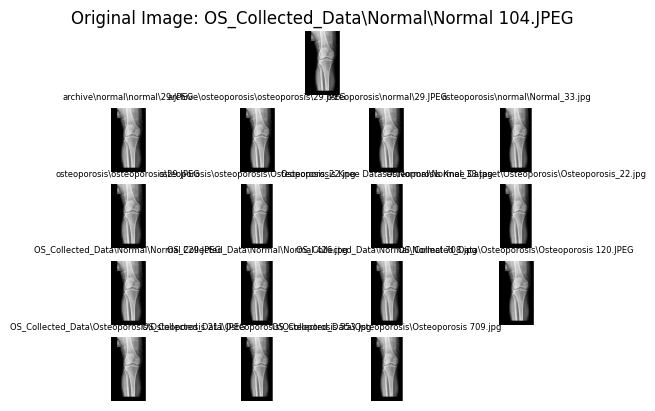

In [6]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=image_dir,
                duplicate_map=duplicates,
                filename='OS_Collected_Data\\Normal\\Normal 104.JPEG')

In [7]:
duplicates

{'archive\\normal\\normal\\10.png': ['osteoporosis\\normal\\10.png',
  'OS_Collected_Data\\Normal\\Normal 1.png',
  'OS_Collected_Data\\Normal\\Normal 223.png'],
 'archive\\normal\\normal\\101.jpg': ['osteoporosis\\normal\\101.jpg',
  'osteoporosis\\normal\\Normal_97.jpg',
  'Osteoporosis Knee Dataset\\Normal\\Normal_97.jpg',
  'OS_Collected_Data\\Normal\\Normal 2.jpg',
  'OS_Collected_Data\\Normal\\Normal 321.jpg',
  'OS_Collected_Data\\Normal\\Normal 503.jpg',
  'OS_Collected_Data\\Normal\\Normal 778.jpg'],
 'archive\\normal\\normal\\104.jpg': ['osteoporosis\\normal\\104.jpg',
  'osteoporosis\\normal\\Normal_98.jpg',
  'Osteoporosis Knee Dataset\\Normal\\Normal_98.jpg',
  'OS_Collected_Data\\Normal\\Normal 3.jpg',
  'OS_Collected_Data\\Normal\\Normal 332.jpg',
  'OS_Collected_Data\\Normal\\Normal 504.jpg',
  'OS_Collected_Data\\Normal\\Normal 779.jpg'],
 'archive\\normal\\normal\\107.jpg': ['osteoporosis\\normal\\107.jpg',
  'osteoporosis\\normal\\Normal_99.jpg',
  'Osteoporosis Knee

In [8]:
from imagededup.methods import PHash

phasher = PHash()
duplicates_list = phasher.find_duplicates_to_remove(image_dir=image_dir,max_distance_threshold = 0, recursive=True)

2025-01-05 22:52:52,110: INFO Start: Calculating hashes...
100%|██████████| 4055/4055 [00:45<00:00, 88.36it/s]
2025-01-05 22:53:39,712: INFO End: Calculating hashes!
2025-01-05 22:53:39,715: INFO Start: Evaluating hamming distances for getting duplicates
2025-01-05 22:53:39,716: INFO Start: Retrieving duplicates using BKTree algorithm
100%|██████████| 4054/4054 [00:16<00:00, 238.95it/s]
2025-01-05 22:53:58,709: INFO End: Retrieving duplicates using BKTree algorithm
2025-01-05 22:53:58,710: INFO End: Evaluating hamming distances for getting duplicates


In [9]:
duplicates_list.__len__()

3046

# removing the images

In [10]:
import os
import shutil
# List of image filenames to remove
images_to_remove = duplicates_list

# Paths
source_folder = image_dir  # Folder containing the images
destination_folder = os.path.join(source_folder, "deleted_images")  # Folder for moved images

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Move files
for image_name in images_to_remove:
    source_path = os.path.join(source_folder, image_name)
    destination_path = os.path.join(destination_folder, image_name)
    
    try:
        # Ensure the destination subfolder exists
        destination_subfolder = os.path.dirname(destination_path)
        os.makedirs(destination_subfolder, exist_ok=True)
        
        if os.path.exists(source_path):
            shutil.move(source_path, destination_path)
            print(f"Moved: {image_name} to {destination_folder}")
        else:
            print(f"File not found: {image_name}")
    except Exception as e:
        print(f"Error moving {image_name}: {e}")


Moved: osteoporosis_modified\Osteopenia\OP112.jpg to data\multi-class-knee-osteoporosis-x-ray-dataset\deleted_images
Moved: Osteoporosis Knee X-ray\osteopenia\OP146.jpg to data\multi-class-knee-osteoporosis-x-ray-dataset\deleted_images
Moved: OS_Collected_Data\Normal\Normal 541.jpg to data\multi-class-knee-osteoporosis-x-ray-dataset\deleted_images
Moved: osteoporosis\osteoporosis\224.png to data\multi-class-knee-osteoporosis-x-ray-dataset\deleted_images
Moved: OS_Collected_Data\Normal\Normal 171.jpg to data\multi-class-knee-osteoporosis-x-ray-dataset\deleted_images
Moved: OS_Collected_Data\Osteoporosis\Osteoporosis 6.png to data\multi-class-knee-osteoporosis-x-ray-dataset\deleted_images
Moved: OS_Collected_Data\Normal\Normal 524.jpg to data\multi-class-knee-osteoporosis-x-ray-dataset\deleted_images
Moved: osteoporosis_modified\Osteopenia\OP97.jpg to data\multi-class-knee-osteoporosis-x-ray-dataset\deleted_images
Moved: OS_Collected_Data\Normal\Normal 549.jpg to data\multi-class-knee-os

# we need to add logic that if image was in 2 classes(normal and osteo) to remove it from both of them